## Penentuan Posisi Obyek Langit dengan Astroplan

Tujuan: perencanaan pengamatan untuk obyek tertentu diamati dari posisi tertentu

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']
# from astropy.visualization import astropy_mpl_style # plot yang lebih bagus
# plt.style.use(astropy_mpl_style)

plt.rcParams['figure.figsize'] = (15, 10) # ukuran gambar diperbesar
plt.rcParams['font.size'] = 16

In [3]:
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

Obyek langit yang dituju adalah Antares. Ambil koordinatnya dari SIMBAD

In [4]:
obj = SkyCoord.from_name('Arcturus')
# Ant = SkyCoord('7h20m', '-10d30m20s', frame = 'icrs') # koordinat obyek dalam sistem icrs (setara J2000)

Lokasi pengamat dengan menggunakan object `EarthLocation` jika lokasi pengamat tidak ada dalam daftar. Contoh kasus yang diambil adalah Observatorium Bosscha, Lembang, Bandung Barat. Waktu pengamatan adalah tanggal 27 Mei 2018 pukul 02.00 WIB. Jika lokasinya adalah observatorium besar yang sudah dikenal luas, maka bisa menggunakan `astropy.coordinates.EarthLocation.get_site_names`

In [5]:
bosscha = EarthLocation(lat=-6.8333*u.deg, lon=107.6167*u.deg, height=1310*u.m) #lokasi Bosscha
utcoffset = 7*u.hour  # Waktu Indonesia Barat
time = Time('2018-5-27 02:00:00') - utcoffset # waktu dalam UT

# EarthLocation.get_site_names() # daftar nama tempat utama/observatorium

Konversi posisi Antares, dari sistem koordinat Equatorial ke sistem koordinat Horizon

In [6]:
obj_altaz = obj.transform_to(AltAz(obstime=time,location=bosscha))
print("Ketinggian Antares = {0.alt:.2}".format(obj_altaz))

Ketinggian Antares = 2.3e+01 deg


Sekarang cari ketinggian Antares ini untuk rentang waktu pengamatan yang diinginkan, misalnya dari pukul 19.00 WIB s.d. 04.00 WIB

In [7]:
midnight = Time('2018-5-27 00:00:00') - utcoffset
delta_midnight = np.linspace(-5, 4, 100)*u.hour # rentang waktu sebelum sampai sesudah tengah malam (5 jam seblm, 4 jam setelah)
frame_at_date = AltAz(obstime=midnight+delta_midnight,
                          location=bosscha) # rentang waktu pengamatan malam hari
obj_altazs_at_date = obj.transform_to(frame_at_date) # alt,az obyek sepanjang rentang waktu pengamatan

Ubah alt dan azimuth obyek ke airmass dengan `~astropy.coordinates.AltAz.secz`

In [8]:
obj_airmasss_at_date = obj_altazs_at_date.secz

Plot airmass sebagai fungsi dari waktu

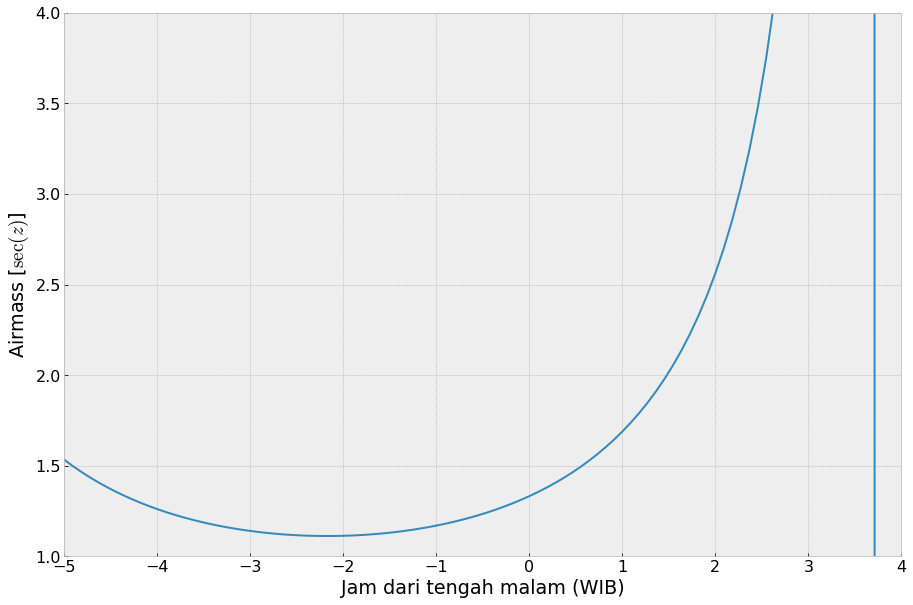

In [9]:
plt.plot(delta_midnight, obj_airmasss_at_date)
plt.xlim(-5, 4)
plt.ylim(1, 4)
plt.xlabel('Jam dari tengah malam (WIB)')
#plt.xlabel('Hours from EDT Midnight')
plt.ylabel('Airmass [$\sec (z)$]')
plt.show()

Cari posisi Matahari dari tengah hari tanggal 22 Mei 2018 s.d. tengah hari tanggal 23 Mei 2018 dengan menggunakan `~astropy.coordinates.get_sun`

In [10]:
from astropy.coordinates import get_sun

delta_midnight = np.linspace(-12, 12, 1000)*u.hour # rentang waktu dibagi menjadi 1000 bagian yang sama
times_today_tomorrow = midnight + delta_midnight
frame_today_tomorrow = AltAz(obstime=times_today_tomorrow, location=bosscha)
sun_altazs_today_tomorrow = get_sun(times_today_tomorrow).transform_to(frame_today_tomorrow)

# sun_airmass_today_tomorrow = sun_altazs_today_tomorrow.secz

Cari posisi Bulan dengan menggunakan `~astropy.coordinates.get_moon`

In [11]:
from astropy.coordinates import get_moon
moon_today_tomorrow = get_moon(times_today_tomorrow)
moon_altazs_today_tomorrow = moon_today_tomorrow.transform_to(frame_today_tomorrow)

# moon_airmass_today_tomorrow = moon_altazs_today_tomorrow.secz

Cari posisi (alt,az) dari Antares untuk rentang waktu yang sama

In [12]:
obj_altazs_today_tomorrow = obj.transform_to(frame_today_tomorrow)

# obj_airmasss_today_tomorrow = obj_altazs_today_tomorrow.secz

Buat plot yang indah

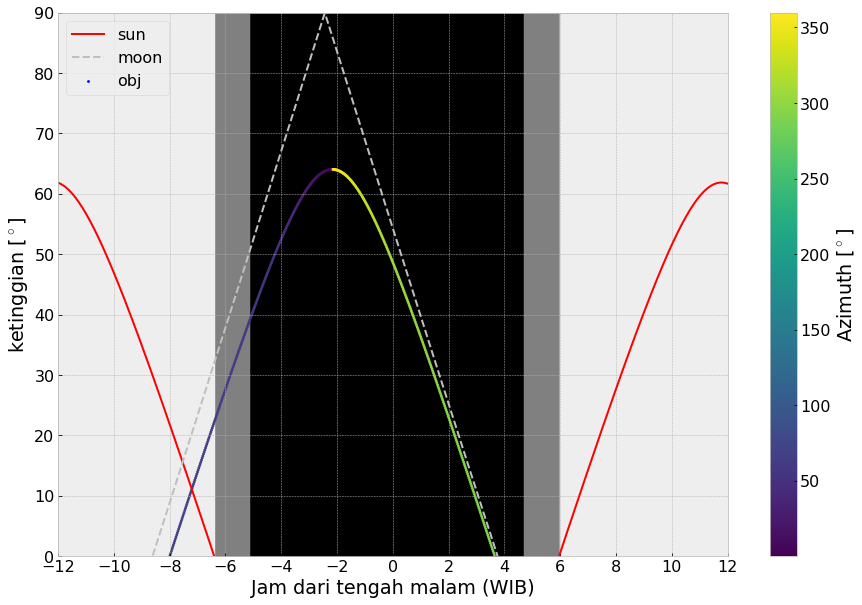

In [13]:
# plt.plot(delta_midnight, sun_altazs_today_tomorrow.alt, color='r', label='sun')
# plt.plot(delta_midnight, moon_altazs_today_tomorrow.alt, color=[0.75]*3, ls='--', label='moon')
# plt.scatter(delta_midnight, obj_altazs_today_tomorrow.alt,
#             c=obj_altazs_today_tomorrow.az, label='obj', lw=0, s=8,
#             cmap='viridis')

plt.plot(delta_midnight, sun_altazs_today_tomorrow.alt, color='r', label='sun')
plt.plot(delta_midnight, moon_altazs_today_tomorrow.alt, color=[0.75]*3, ls='--', label='moon')
plt.scatter(delta_midnight, obj_altazs_today_tomorrow.alt,
            c=obj_altazs_today_tomorrow.az, label='obj', lw=0, s=8,
            cmap='viridis')
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sun_altazs_today_tomorrow.alt < -0*u.deg, color='0.5', zorder=0)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sun_altazs_today_tomorrow.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Azimuth [$^\circ$]')
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(0, 90)
plt.xlabel('Jam dari tengah malam (WIB)')
plt.ylabel('ketinggian [$^\circ$]')
plt.show()